# Capstone Project - The Battle of Neighborhoods Part 1

## **Introduction**
With Covid-19 and Brexit firmly taken route in the UK, it is imperetive to sell London as an international city which is safe for skilled foreign immigrants to come and settle. Especially those who will work for the NHS. The Covid19 crisis has shown how fractured our NHS and society is since the Brexit Vote. With a large outflowing of foreign professionals going bck to their country of origin. 

I have taken it upo myself to highlight the safest boroughs for our key healthcare workers from abroad to settle in. I intend to show what London has to offer in both Venues and the crime rates within each borough. I will help explore amanities and transportation links.

The population of the London is estimated to be around 8.96 million people in 2019, an increase of over 2 million people when compared with the early 1980s. Throughout the 1980s the population of the United Kingdom's capital grew at a very slow rate, before accelerating to a much faster rate in the 1990s.

London is one of the most ethnically diverse cities in the world. A 2000 survey of school children reported there were over 300 languages spoken at home.

At the 2011 census, London had a population of 8,173,941. Of this number 44.9% were White British. 37% of the population were born outside the UK, including 24.5% born outside of Europe.

# Data Section

 ## Data Acquisition and Preprocessing 

### In this project, I will be using the following datasets to help solve my problem:
* London Borough and Coordinates data scrapped from Wikipedia page
* Mapping using foursquare
* Crime data from https://data.london.gov.uk/dataset/recorded_crime_summary
 

## Methodology
* Using Foursquare API to retrieve all venues of each neighborhoods. 
* Analyse crime rates
* Segmenting boroughs using k-means clustering
* Top 10 most common venue types of each neighborhoods or Borough. 
* The neighborhoods will be then put in different clusters based on similar or common atributes using K-means clustering.

In [26]:
import pandas as pd
import numpy as np

In [27]:
# Read crime records data into dataftrame
df1 = pd.read_csv('LCrime1.csv')
df1.head()

,Major,Borough,Sum
0,Arson and Criminal Damage,Barking_and_Dagenham,2806
1,Arson and Criminal Damage,Barnet,4055
2,Arson and Criminal Damage,Bexley,3059
3,Arson and Criminal Damage,Brent,4102
4,Arson and Criminal Damage,Bromley,3906


In [28]:
# Names of Boroughs
df1['Borough'].unique()

array(['Barking_and_Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith_and_Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington_and_Chelsea',
       'Kingston_upon_Thames', 'Lambeth', 'Lewisham',
       'London_Heathrow_and_London_City_Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond_upon_Thames', 'Southwark', 'Sutton',
       'Tower_Hamlets', 'Waltham_Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [29]:
# Calculate sum of incidents in the last 24 months by boroughs
df2 = df1.groupby(['Borough','Major'], as_index=False).sum()
df2.head()

,Borough,Major,Sum
0,Barking_and_Dagenham,Arson and Criminal Damage,2806
1,Barking_and_Dagenham,Burglary,3006
2,Barking_and_Dagenham,Drug Offences,2504
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,578
4,Barking_and_Dagenham,Possession of Weapons,369


In [30]:
# Drop unnecessary columns
df2.drop(df2.columns[3:26], axis=1, inplace=True)
df2.head()

,Borough,Major,Sum
0,Barking_and_Dagenham,Arson and Criminal Damage,2806
1,Barking_and_Dagenham,Burglary,3006
2,Barking_and_Dagenham,Drug Offences,2504
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,578
4,Barking_and_Dagenham,Possession of Weapons,369


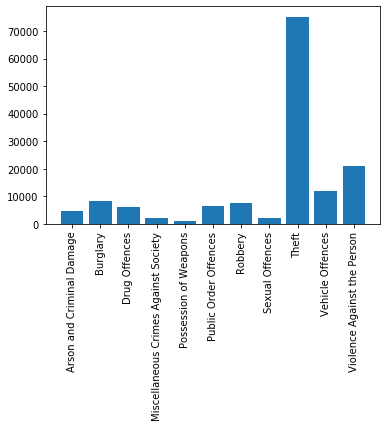

<Figure size 720x720 with 0 Axes>

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

x = df2.Major
y = df2.Sum
plt.xticks(rotation=90)
plt.bar(x, y)
fig = plt.figure(figsize=(10,10))
plt.show()  # or plt.savefig("name.png")

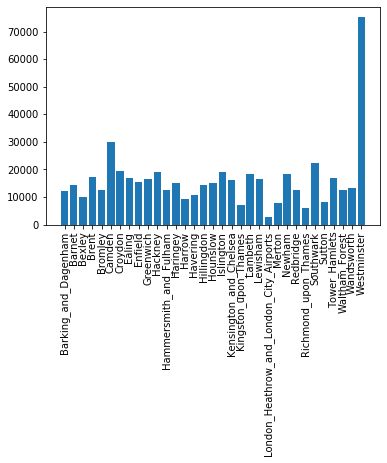

<Figure size 3600x2160 with 0 Axes>

In [34]:
x = df2.Borough
y = df2.Sum
plt.xticks(rotation=90)
plt.bar(x, y)
fig = plt.figure(figsize=(50,30))
plt.show()  # or plt.savefig("name.png")

In [303]:
df2.head()

,Borough,Major,Sum
0,Barking_and_Dagenham,Arson and Criminal Damage,2806
1,Barking_and_Dagenham,Burglary,3006
2,Barking_and_Dagenham,Drug Offences,2504
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,578
4,Barking_and_Dagenham,Possession of Weapons,369


In [304]:
df3 = df2.rename({'Sum': 'MonthlyAverage'}, axis=1)

In [305]:
df3.head()

,Borough,Major,MonthlyAverage
0,Barking_and_Dagenham,Arson and Criminal Damage,2806
1,Barking_and_Dagenham,Burglary,3006
2,Barking_and_Dagenham,Drug Offences,2504
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,578
4,Barking_and_Dagenham,Possession of Weapons,369


In [306]:
df3['MonthlyAverage'] = df3['MonthlyAverage']/24

In [324]:
df3.head()

,Borough,Major,MonthlyAverage
0,Barking_and_Dagenham,Arson and Criminal Damage,116.916667
1,Barking_and_Dagenham,Burglary,125.250000
2,Barking_and_Dagenham,Drug Offences,104.333333
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,24.083333
4,Barking_and_Dagenham,Possession of Weapons,15.375000


In [325]:
df4 = df3.rename({'MonthlyAverage': 'MonthlyAvg'}, axis=1)

In [326]:
df4.head()

,Borough,Major,MonthlyAvg
0,Barking_and_Dagenham,Arson and Criminal Damage,116.916667
1,Barking_and_Dagenham,Burglary,125.250000
2,Barking_and_Dagenham,Drug Offences,104.333333
3,Barking_and_Dagenham,Miscellaneous Crimes Against Society,24.083333
4,Barking_and_Dagenham,Possession of Weapons,15.375000


In [327]:
df4.drop(columns='Major', axis=1, inplace=True)
df4.head()

,Borough,MonthlyAvg
0,Barking_and_Dagenham,116.916667
1,Barking_and_Dagenham,125.250000
2,Barking_and_Dagenham,104.333333
3,Barking_and_Dagenham,24.083333
4,Barking_and_Dagenham,15.375000


In [328]:
df4 = df4.groupby(['Borough'], as_index=False).sum()
df4.head()

,Borough,MonthlyAvg
0,Barking_and_Dagenham,1616.166667
1,Barnet,2467.208333
2,Bexley,1403.833333
3,Brent,2496.708333
4,Bromley,1983.833333


In [288]:
table = df3.pivot(index='Borough',columns='Major',values='MonthlyAverage')  
print (table)

Major                                     Arson and Criminal Damage  \
Borough                                                               
Barking_and_Dagenham                                     116.916667   
Barnet                                                   168.958333   
Bexley                                                   127.458333   
Brent                                                    170.916667   
Bromley                                                  162.750000   
Camden                                                   133.875000   
Croydon                                                  203.000000   
Ealing                                                   178.958333   
Enfield                                                  167.000000   
Greenwich                                                178.250000   
Hackney                                                  148.166667   
Hammersmith_and_Fulham                                   104.333333   
Haring

TypeError: 'Series' object is not callable

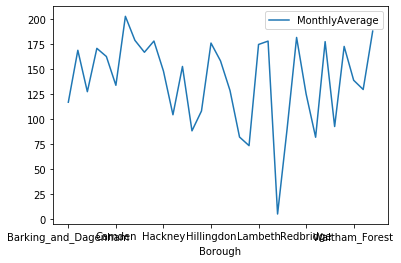

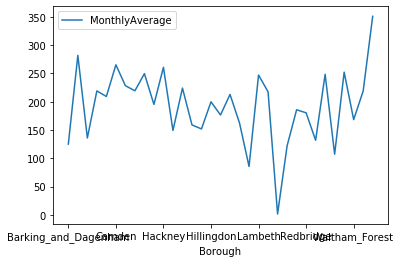

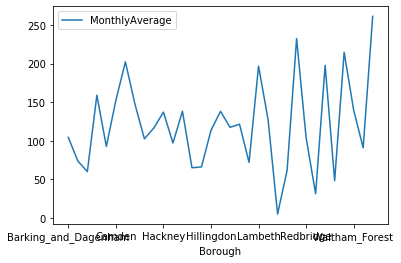

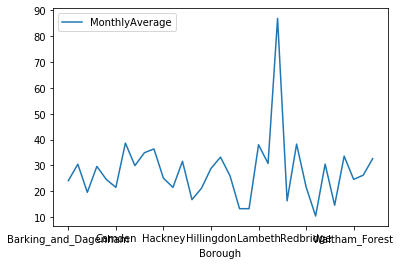

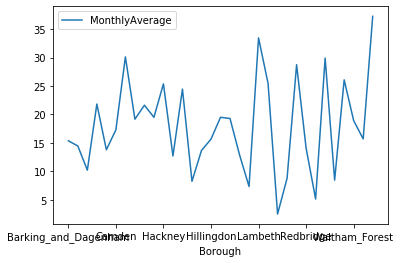

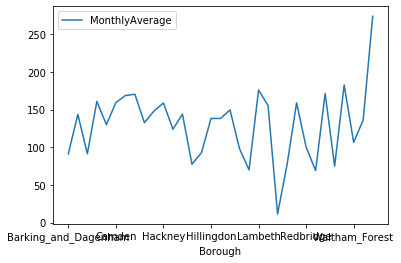

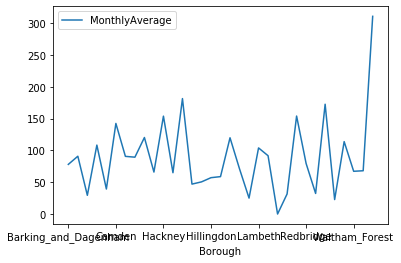

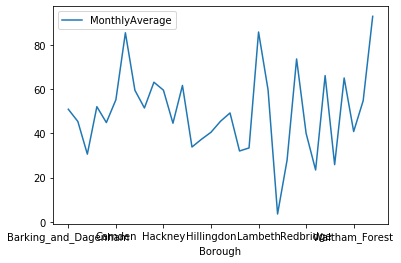

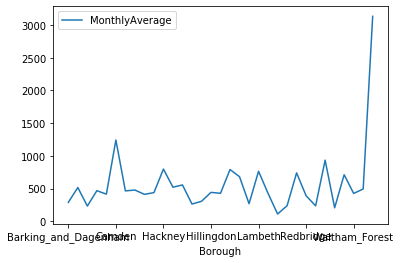

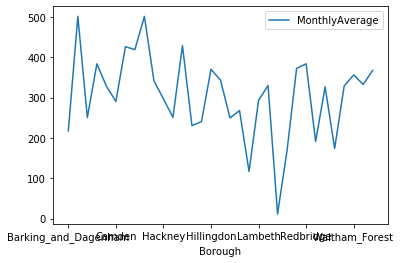

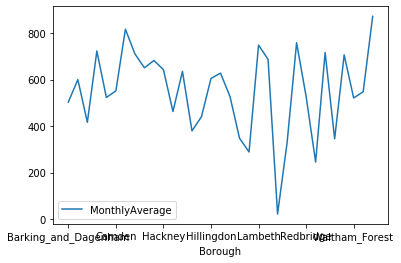

In [41]:
df3.groupby('Major').plot(x='Borough', y='MonthlyAverage') (legend=True)


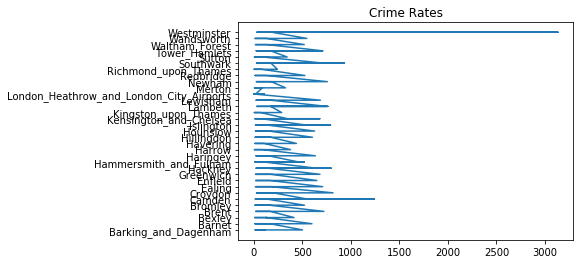

In [68]:
plt.title('Crime Rates')

plt.plot(df3.MonthlyAverage, df3.Borough)

plt.show()

In [94]:
Barnet = df3[df3.Borough == "Barnet"]
Bexley = df3[df3.Borough == "Bexley"]
Barking_and_Dagenham = df3[df3.Borough == "Barking_and_Dagenham"]
Brent = df3[df3.Borough == "Brent"]

Bromley = df3[df3.Borough == "Bromley"]
Camden = df3[df3.Borough == "Camden"]
Croydon = df3[df3.Borough == "Croydon"]
Ealing = df3[df3.Borough == "Ealing"]

Enfield = df3[df3.Borough == "Enfield"]
Greenwich = df3[df3.Borough == "Greenwich"]
Hackney = df3[df3.Borough == "Hackney"]
Hammersmith_and_Fulham = df3[df3.Borough == "Hammersmith_and_Fulham"]

Haringey = df3[df3.Borough == "Haringey"]
Harrow = df3[df3.Borough == "Harrow"]
Havering = df3[df3.Borough == "Havering"]
Hillingdon = df3[df3.Borough == "Hillingdon"]

Hounslow = df3[df3.Borough == "Hounslow"]
Islington = df3[df3.Borough == "Islington"]
Kensington_and_Chelsea = df3[df3.Borough == "Kensington_and_Chelsea"]
Kingston_upon_Thames = df3[df3.Borough == "Kingston_upon_Thames"]

Lambeth = df3[df3.Borough == "Lambeth"]
Lewisham = df3[df3.Borough == "Lewisham"]
London_Heathrow_and_London_City_Airports = df3[df3.Borough == "London_Heathrow_and_London_City_Airports"]
Merton = df3[df3.Borough == "Merton"]

Newham = df3[df3.Borough == "Newham"]
Redbridge = df3[df3.Borough == "Redbridge"]
Richmond_upon_Thames = df3[df3.Borough == "Richmond_upon_Thames"]
Southwark = df3[df3.Borough == "Southwark"]

Sutton = df3[df3.Borough == "Sutton"]
Tower_Hamlets = df3[df3.Borough == "Tower_Hamlets"]
Waltham_Forest = df3[df3.Borough == "Waltham_Forest"]
Wandsworth = df3[df3.Borough == "Wandsworth"]

Westminster = df3[df3.Borough == "Westminster"]

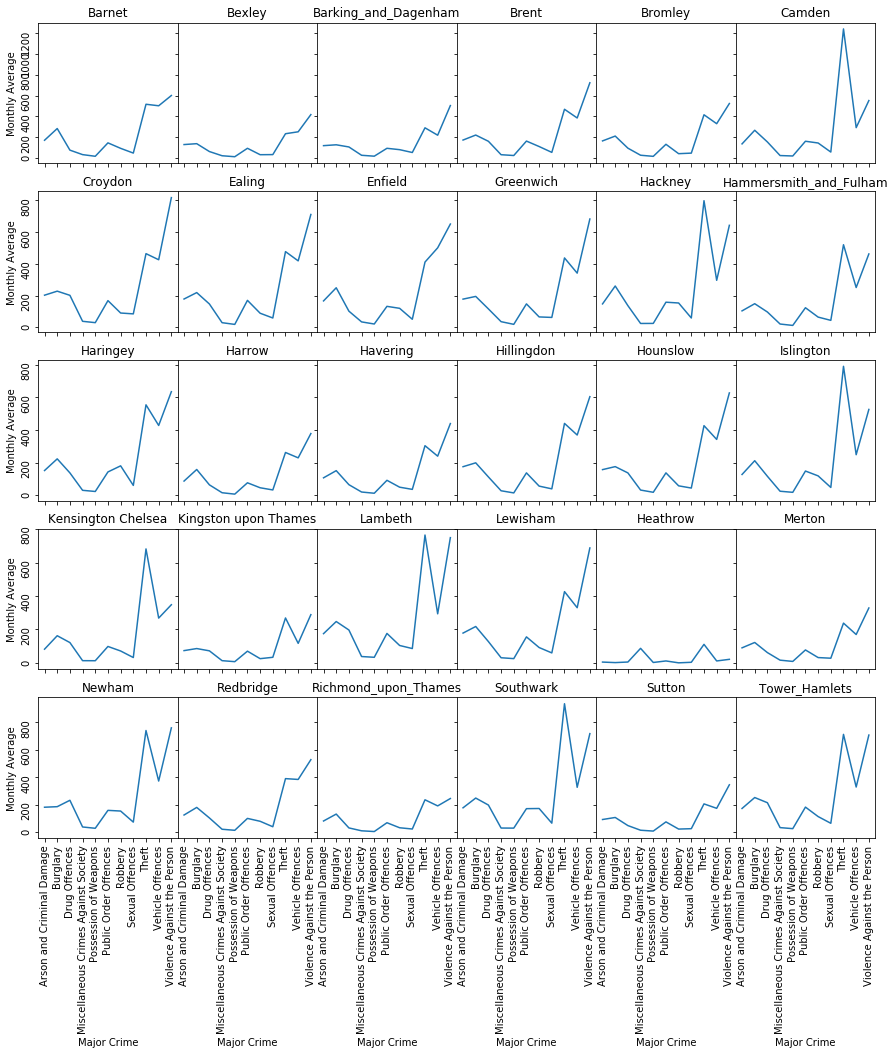

In [193]:
fig, axes = plt.subplots(5, 6, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0})

plt.rcParams['figure.figsize'] = [15, 15]


axes[0,0].plot(Barnet.Major, Barnet.MonthlyAverage)
axes[0,0].set_title('Barnet')
axes[0,1].plot(Bexley.Major, Bexley.MonthlyAverage)
axes[0,1].set_title('Bexley')
axes[0,2].plot(Barking_and_Dagenham.Major, Barking_and_Dagenham.MonthlyAverage)
axes[0,2].set_title('Barking_and_Dagenham')
axes[0,3].plot(Brent.Major, Brent.MonthlyAverage)
axes[0,3].set_title('Brent')
axes[0,4].plot(Bromley.Major, Bromley.MonthlyAverage)
axes[0,4].set_title('Bromley')
axes[0,5].plot(Camden.Major, Camden.MonthlyAverage)
axes[0,5].set_title('Camden')

axes[1,0].plot(Croydon.Major, Croydon.MonthlyAverage)
axes[1,0].set_title('Croydon')
axes[1,1].plot(Ealing.Major, Ealing.MonthlyAverage)
axes[1,1].set_title('Ealing')
axes[1,2].plot(Enfield.Major, Enfield.MonthlyAverage)
axes[1,2].set_title('Enfield')
axes[1,3].plot(Greenwich.Major, Greenwich.MonthlyAverage)
axes[1,3].set_title('Greenwich')
axes[1,4].plot(Hackney.Major, Hackney.MonthlyAverage)
axes[1,4].set_title('Hackney')
axes[1,5].plot(Hammersmith_and_Fulham.Major, Hammersmith_and_Fulham.MonthlyAverage)
axes[1,5].set_title('Hammersmith_and_Fulham')


axes[2,0].plot(Haringey.Major, Haringey.MonthlyAverage)
axes[2,0].set_title('Haringey')
axes[2,1].plot(Harrow.Major, Harrow.MonthlyAverage)
axes[2,1].set_title('Harrow')
axes[2,2].plot(Havering.Major, Havering.MonthlyAverage)
axes[2,2].set_title('Havering')
axes[2,3].plot(Hillingdon.Major, Hillingdon.MonthlyAverage)
axes[2,3].set_title('Hillingdon')
axes[2,4].plot(Hounslow.Major, Hounslow.MonthlyAverage)
axes[2,4].set_title('Hounslow')
axes[2,5].plot(Islington.Major, Islington.MonthlyAverage)
axes[2,5].set_title('Islington')


axes[3,0].plot(Kensington_and_Chelsea.Major, Kensington_and_Chelsea.MonthlyAverage)
axes[3,0].set_title('Kensington Chelsea')
axes[3,1].plot(Kingston_upon_Thames.Major, Kingston_upon_Thames.MonthlyAverage)
axes[3,1].set_title('Kingston upon Thames')
axes[3,2].plot(Lambeth.Major, Lambeth.MonthlyAverage)
axes[3,2].set_title('Lambeth')
axes[3,3].plot(Lewisham.Major, Lewisham.MonthlyAverage)
axes[3,3].set_title('Lewisham')
axes[3,4].plot(London_Heathrow_and_London_City_Airports.Major, London_Heathrow_and_London_City_Airports.MonthlyAverage)
axes[3,4].set_title('Heathrow')
axes[3,5].plot(Merton.Major, Merton.MonthlyAverage)
axes[3,5].set_title('Merton')

axes[4,0].plot(Newham.Major, Newham.MonthlyAverage)
axes[4,0].set_title('Newham')
axes[4,1].plot(Redbridge.Major, Redbridge.MonthlyAverage)
axes[4,1].set_title('Redbridge')
axes[4,2].plot(Richmond_upon_Thames.Major, Richmond_upon_Thames.MonthlyAverage)
axes[4,2].set_title('Richmond_upon_Thames')
axes[4,3].plot(Southwark.Major, Southwark.MonthlyAverage)
axes[4,3].set_title('Southwark')
axes[4,4].plot(Sutton.Major, Sutton.MonthlyAverage)
axes[4,4].set_title('Sutton')
axes[4,5].plot(Tower_Hamlets.Major, Tower_Hamlets.MonthlyAverage)
axes[4,5].set_title('Tower_Hamlets')


for ax in axes.flat:
    ax.set(xlabel='Major Crime', ylabel='Monthly Average')


for axes in fig.axes:
    axes.tick_params(labelrotation=90)
for axes in fig.get_axes():
    axes.label_outer()

plt.show()   




## Scraping London Borough Information

In [195]:
import requests
import lxml
from bs4 import BeautifulSoup

In [196]:
# scrapping data about London Boroughs from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ae93679f-214f-4a51-9fcb-0074e7d35d47","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [197]:
Borough = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [198]:
# Form a dataframe
dict = {'Borough' : Borough,
       'Population' : Population,
       'Coordinates': Coordinates}
Londondata = pd.DataFrame.from_dict(dict)
Londondata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [199]:
# Strip unwanted texts
Londondata['Borough'] = Londondata['Borough'].map(lambda x: x.rstrip(']'))
Londondata['Borough'] = Londondata['Borough'].map(lambda x: x.rstrip('1234567890.'))
Londondata['Borough'] = Londondata['Borough'].str.replace('note','')
Londondata['Borough'] = Londondata['Borough'].map(lambda x: x.rstrip(' ['))
Londondata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [201]:
# Clean coordinates
Londondata[['Coordinates1','Coordinates2', 'Coordinates3']] = Londondata['Coordinates'].str.split('/',expand=True)
Londondata.head()

,Borough,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [202]:
Londondata.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
Londondata[['Latitude','Longitude']] = Londondata['Coordinates3'].str.split(';',expand=True)
Londondata.head()

,Borough,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [203]:
Londondata.drop(labels=['Coordinates3'], axis=1,inplace = True)
Londondata['Latitude'] = Londondata['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
Londondata['Latitude'] = Londondata['Latitude'].map(lambda x: x.lstrip())
Londondata['Longitude'] = Londondata['Longitude'].map(lambda x: x.rstrip(')'))
Londondata['Longitude'] = Londondata['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
Londondata['Longitude'] = Londondata['Longitude'].map(lambda x: x.rstrip(' ('))
Londondata['Longitude'] = Londondata['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
Londondata['Longitude'] = Londondata['Longitude'].map(lambda x: x.lstrip())
Londondata['Population'] = Londondata['Population'].str.replace(',','')
Londondata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [205]:
Londondata['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [208]:
# foursquare credentials
CLIENT_ID = 'NGPXXABK5MAWEATDHOXCZEVYWD1PXXYXN5WHMKSVGAXS1WH0' # my Foursquare ID
CLIENT_SECRET = 'DZ141HVPMH2M32Y3TXQSJQQZJYX0XQLQEOGVCI0XSEGHU2EL' # my Foursquare Secret  
VERSION = '20190101'
LIMIT = 50
radius = 500

In [209]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [211]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=Londondata['Borough'],
                                   latitudes=Londondata['Latitude'],
                                   longitudes=Londondata['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [289]:
print(venues.shape)
venues.head()

(1123, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [312]:
df4.head()

,Borough,MonthlyAvg
0,Barking_and_Dagenham,116.916667
1,Barking_and_Dagenham,125.250000
2,Barking_and_Dagenham,104.333333
3,Barking_and_Dagenham,24.083333
4,Barking_and_Dagenham,15.375000


In [313]:
# take a look at londata data
Londondata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [314]:
venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [329]:
#Combine crime data and borough information data
df5 = pd.merge(df4,Londondata, how='inner', on='Borough')
df5.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude
0,Barnet,2467.208333,369088,51.6252,-0.1517
1,Bexley,1403.833333,236687,51.4549,0.1505
2,Brent,2496.708333,317264,51.5588,-0.2817
3,Bromley,1983.833333,317899,51.4039,0.0198
4,Camden,3031.833333,229719,51.5290,-0.1255


In [330]:
#Create a column of crimes per 1000 people per month
df5['Population'].astype(float)
df5['CrimeRate'] = df5['MonthlyAvg'] / df['Population'] * 1000
df5

,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeRate
0,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607
1,Bexley,1403.833333,236687,51.4549,0.1505,3.803519
2,Brent,2496.708333,317264,51.5588,-0.2817,6.764534
3,Bromley,1983.833333,317899,51.4039,0.0198,5.374960
4,Camden,3031.833333,229719,51.5290,-0.1255,8.214392
5,Croydon,2754.875000,372752,51.3714,-0.0977,7.464006
6,Ealing,2521.750000,342494,51.5130,-0.3089,6.832381
7,Enfield,2443.666667,320524,51.6538,-0.0799,6.620824
8,Greenwich,2285.458333,264008,51.4892,0.0648,6.192177
9,Hackney,2705.958333,257379,51.5450,-0.0553,7.331472


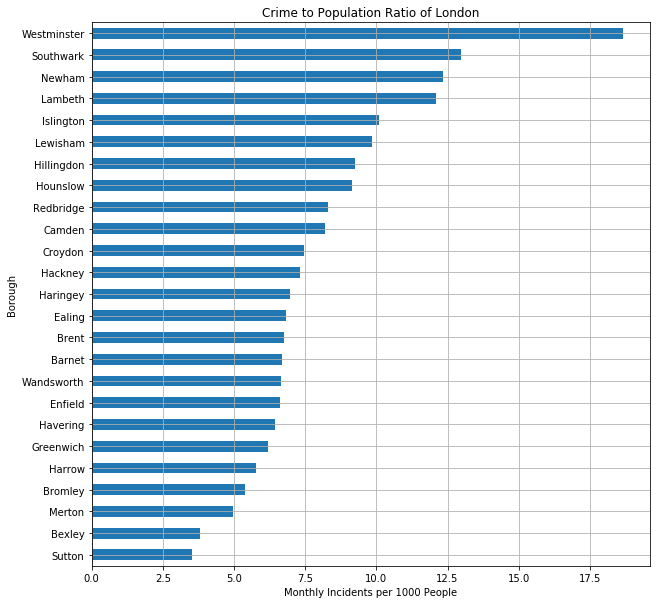

In [331]:
#Visualize crime per 1000 people
df5.set_index('Borough')['CrimeRate'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

## Borough Segment Analysis

In [332]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 182 uniques categories.


In [335]:
# One hot encoding before clustering
df6 = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [336]:
# Add borough name back to dataframe
NewBorough = venues['Borough']
df6.insert(0, 'Borough', NewBorough)
df6.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = df6.groupby('Borough').mean().reset_index()
grouped.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035714,0.0,0.035714,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [338]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['Borough']:
    print("----"+hood+"----")
    temp = grouped[grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0  Martial Arts Dojo  0.14
1               Pool  0.14
2        Bus Station  0.14
3        Supermarket  0.14
4        Golf Course  0.14


----Barnet----
                venue  freq
0                Café  0.50
1            Bus Stop  0.25
2    Business Service  0.25
3  African Restaurant  0.00
4                Park  0.00


----Bexley----
              venue  freq
0               Pub  0.11
1       Coffee Shop  0.11
2    Clothing Store  0.11
3  Department Store  0.07
4          Pharmacy  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2  Sporting Goods Shop  0.06
3       Clothing Store  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.16
1           Coffee Shop  0.13
2  Gym / Fitness Center  0.05
3          Burger Joint  0.05
4           Pizza Place  0.05


----Camden----
                venue  freq
0         Coffee S

In [420]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Borough'] = grouped['Borough']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Gym / Fitness Center,Bus Station,Supermarket,Martial Arts Dojo,Park,Golf Course,Department Store,Cupcake Shop,Fast Food Restaurant
1,Barnet,Café,Bus Stop,Business Service,Yoga Studio,Electronics Store,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
2,Bexley,Coffee Shop,Pub,Clothing Store,Supermarket,Pharmacy,Fast Food Restaurant,Department Store,Portuguese Restaurant,Sandwich Place,Chinese Restaurant
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,Bar,American Restaurant,Sandwich Place,Burger Joint,Plaza
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Irish Pub,Donut Shop,English Restaurant,Sandwich Place,Café


In [421]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [422]:
kclusters = 5
london_cluster = grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([1, 0, 3, 1, 3, 1, 1, 1, 3, 3])

In [423]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge crime with coords to add latitude/longitude for each neighborhood
london_whole = df5
london_whole = london_whole.join(venues_sorted.set_index('Borough'), on='Borough')

london_whole.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607,0,Café,Bus Stop,Business Service,Yoga Studio,Electronics Store,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
1,Bexley,1403.833333,236687,51.4549,0.1505,3.803519,3,Coffee Shop,Pub,Clothing Store,Supermarket,Pharmacy,Fast Food Restaurant,Department Store,Portuguese Restaurant,Sandwich Place,Chinese Restaurant
2,Brent,2496.708333,317264,51.5588,-0.2817,6.764534,1,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,Bar,American Restaurant,Sandwich Place,Burger Joint,Plaza
3,Bromley,1983.833333,317899,51.4039,0.0198,5.374960,3,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Irish Pub,Donut Shop,English Restaurant,Sandwich Place,Café
4,Camden,3031.833333,229719,51.5290,-0.1255,8.214392,1,Café,Coffee Shop,Hotel,Burger Joint,Garden,Breakfast Spot,Deli / Bodega,Italian Restaurant,Pizza Place,Train Station


In [429]:
london_whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 25 non-null     object 
 1   MonthlyAvg              25 non-null     float64
 2   Population              25 non-null     object 
 3   Latitude                25 non-null     object 
 4   Longitude               25 non-null     object 
 5   CrimeRate               25 non-null     float64
 6   Cluster Labels          25 non-null     int32  
 7   1st Most Common Venue   25 non-null     object 
 8   2nd Most Common Venue   25 non-null     object 
 9   3rd Most Common Venue   25 non-null     object 
 10  4th Most Common Venue   25 non-null     object 
 11  5th Most Common Venue   25 non-null     object 
 12  6th Most Common Venue   25 non-null     object 
 13  7th Most Common Venue   25 non-null     object 
 14  8th Most Common Venue   25 non-null     obje

In [437]:
london_whole["Latitude"] = london_whole.Latitude.astype(float)
london_whole["Longitude"] = london_whole.Longitude.astype(float)

In [438]:
london_whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 25 non-null     object 
 1   MonthlyAvg              25 non-null     float64
 2   Population              25 non-null     object 
 3   Latitude                25 non-null     float64
 4   Longitude               25 non-null     float64
 5   CrimeRate               25 non-null     float64
 6   Cluster Labels          25 non-null     int32  
 7   1st Most Common Venue   25 non-null     object 
 8   2nd Most Common Venue   25 non-null     object 
 9   3rd Most Common Venue   25 non-null     object 
 10  4th Most Common Venue   25 non-null     object 
 11  5th Most Common Venue   25 non-null     object 
 12  6th Most Common Venue   25 non-null     object 
 13  7th Most Common Venue   25 non-null     object 
 14  8th Most Common Venue   25 non-null     obje

In [439]:
import folium
from IPython.display import display
from folium.plugins import HeatMap

LDN_COORDINATES = (51.5074, -0.118092)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=10)

#folium.Marker([51.5079, 0.0877], popup='London Bridge').add_to(myMap)


# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(london_whole['Latitude'], london_whole['Longitude'], london_whole['Borough'], london_whole['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(myMap)

display(myMap)

       

## Results

In [440]:
# Segment 0: Healthy area
london_whole.loc[london_whole['Cluster Labels'] == 0, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,6.684607,0,Café,Bus Stop,Business Service,Yoga Studio,Electronics Store,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space


In [441]:
# Segment 1: Lively area (Hotels, Restaurants)
london_whole.loc[london_whole['Cluster Labels'] == 1, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brent,6.764534,1,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,Bar,American Restaurant,Sandwich Place,Burger Joint,Plaza
4,Camden,8.214392,1,Café,Coffee Shop,Hotel,Burger Joint,Garden,Breakfast Spot,Deli / Bodega,Italian Restaurant,Pizza Place,Train Station
5,Croydon,7.464006,1,Pub,Coffee Shop,Malay Restaurant,Food Court,Supermarket,Strip Club,Gaming Cafe,Bookstore,Breakfast Spot,Portuguese Restaurant
6,Ealing,6.832381,1,Coffee Shop,Italian Restaurant,Pizza Place,Clothing Store,Park,Vietnamese Restaurant,Hotel,Burger Joint,Pub,Ramen Restaurant
9,Hackney,7.331472,1,Pub,Coffee Shop,Café,Bakery,Brewery,Modern European Restaurant,Hotel,Vietnamese Restaurant,Cocktail Bar,Vegetarian / Vegan Restaurant
10,Haringey,6.984445,1,Park,Bus Stop,Turkish Restaurant,Mediterranean Restaurant,Café,Fast Food Restaurant,Bar,Bakery,Pub,Grocery Store
15,Islington,10.098956,1,Pub,Bakery,Turkish Restaurant,Boutique,Ice Cream Shop,Theater,Burger Joint,French Restaurant,Liquor Store,Latin American Restaurant
16,Lambeth,12.094207,1,Caribbean Restaurant,Market,Pub,Pizza Place,Cocktail Bar,Tapas Restaurant,Restaurant,Beer Bar,BBQ Joint,Indian Restaurant
17,Lewisham,9.841936,1,Supermarket,Grocery Store,Coffee Shop,Platform,Italian Restaurant,Train Station,Cocktail Bar,Pharmacy,Pizza Place,Portuguese Restaurant
18,Merton,4.949223,1,Café,Supermarket,Park,Indian Restaurant,Bakery,Bus Stop,Fast Food Restaurant,Pizza Place,Garden Center,Sandwich Place


In [442]:
# Segment 2: Business area (Coffee shops,Markets,Business services)
london_whole.loc[london_whole['Cluster Labels'] == 2, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Harrow,5.78401,2,Platform,Indian Restaurant,Grocery Store,Coffee Shop,Supermarket,Indie Movie Theater,Hostel,Film Studio,Farmers Market,Event Space


In [443]:
# Segment 3:Busy/ lively area
london_whole.loc[london_whole['Cluster Labels'] == 3, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bexley,3.803519,3,Coffee Shop,Pub,Clothing Store,Supermarket,Pharmacy,Fast Food Restaurant,Department Store,Portuguese Restaurant,Sandwich Place,Chinese Restaurant
3,Bromley,5.374960,3,Clothing Store,Coffee Shop,Burger Joint,Pizza Place,Gym / Fitness Center,Irish Pub,Donut Shop,English Restaurant,Sandwich Place,Café
7,Enfield,6.620824,3,Coffee Shop,Clothing Store,Supermarket,Optical Shop,Pub,Department Store,Bookstore,Gift Shop,Stationery Store,Pharmacy
8,Greenwich,6.192177,3,Pub,Coffee Shop,Clothing Store,Pharmacy,Supermarket,Hotel,Plaza,Sandwich Place,Grocery Store,Fast Food Restaurant
12,Havering,6.455607,3,Clothing Store,Coffee Shop,Hotel,Shopping Mall,Pub,Fast Food Restaurant,Department Store,Café,Bakery,Bookstore
13,Hillingdon,9.239523,3,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Pizza Place,Toy / Game Store,Burger Joint,Fast Food Restaurant,Shopping Mall,Pub
20,Redbridge,8.308617,3,Clothing Store,Supermarket,Hotel,Department Store,Sandwich Place,Bakery,Coffee Shop,Fast Food Restaurant,Grocery Store,Movie Theater
22,Sutton,3.531234,3,Clothing Store,Pub,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Bar,Pizza Place,Portuguese Restaurant,Irish Pub
23,Wandsworth,6.666372,3,Pub,Coffee Shop,Clothing Store,Breakfast Spot,Sandwich Place,Supermarket,Indian Restaurant,Gym / Fitness Center,Pharmacy,Pizza Place


In [444]:
# Segment 4: Tourist area
london_whole.loc[london_whole['Cluster Labels'] == 4, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeRate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Hounslow,9.156784,4,Bed & Breakfast,Pizza Place,Park,Café,Yoga Studio,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
